<a href="https://colab.research.google.com/github/jadhav-rakesh/Time_Series_Forecasting/blob/main/naive_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Time series
* A time series is a set of data points ordered in time.

# Components of a time series
* Time series decomposition
    * Time series decomposition is a process by which we separate a time series into its components: trend, seasonality, and residuals.

* Trend
    * The trend represents the slow-moving changes in a time series. It is responsible for making the series gradually increase or decrease over time.

* Seasonal
    * The seasonality component represents the seasonal pattern in the series. The cycles occur repeatedly over a fixed period of time.

* Residuals
    * The residuals represent the behavior that cannot be explained by the trend and seasonality components. They correspond to random errors, also termed white noise.


* Forecasting is predicting the future using historical data and knowledge of future events that might affect our forecasts

#How time series forecasting is different from other regression tasks
     - Time series have an order
     - Time series are indexed by time
     - Time series sometimes do not have features

    

#A naive prediction of the future

#Defining a baseline model
    - compute the mean of the values over a certain period and assume that future values will be equal to that mean
    - last recorded data point
    - if we see a cyclical pattern in our data, we can simply repeat that pattern into the future

* Predict the quarterly earnings per share (EPS) of Johnson & Johnson
* Use the data from 1960 to the end of 1979 in order to predict the EPS for the four quarters of 1980

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/jj.csv")
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [3]:
df.tail()

,date,data
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


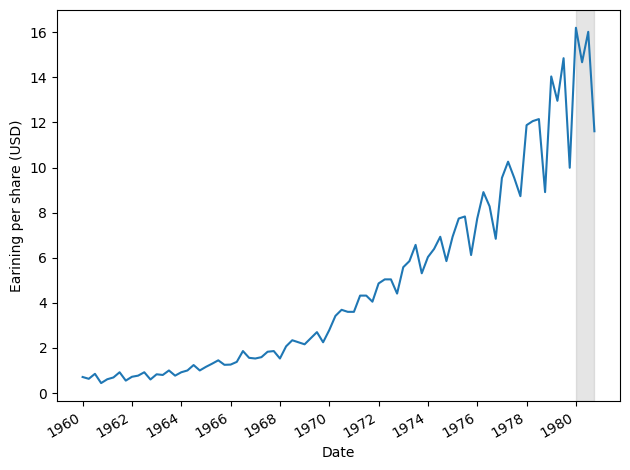

In [4]:
fig, ax = plt.subplots()

ax.plot(df["date"], df["data"])
ax.set_xlabel("Date")
ax.set_ylabel("Earining per share (USD)")
ax.axvspan(80, 83, color="grey", alpha=0.2)

plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig("ts1.png", dpi=300)

In [5]:
train = df[:-4]
test = df[-4:]

#Historical Mean

In [6]:
historical_mean = np.mean(train["data"])
historical_mean

4.308499987499999

In [7]:
test.loc[:, "pred_mean"] = historical_mean
test

<ipython-input-7-98cd5c87cad0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, "pred_mean"] = historical_mean


,date,data,pred_mean
80,1980-01-01,16.20,4.3085
81,1980-04-01,14.67,4.3085
82,1980-07-02,16.02,4.3085
83,1980-10-01,11.61,4.3085


#mean absolute percentage error (MAPE)
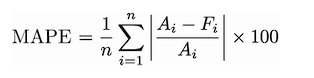

*  easy to interpret and independent of the scale of our data

    * A - actual value
    * F - forcast value
    * n - # forecasts


In [8]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [9]:
mape_hist_mean = mape(test["data"], test["pred_mean"])
mape_hist_mean

70.00752579965119

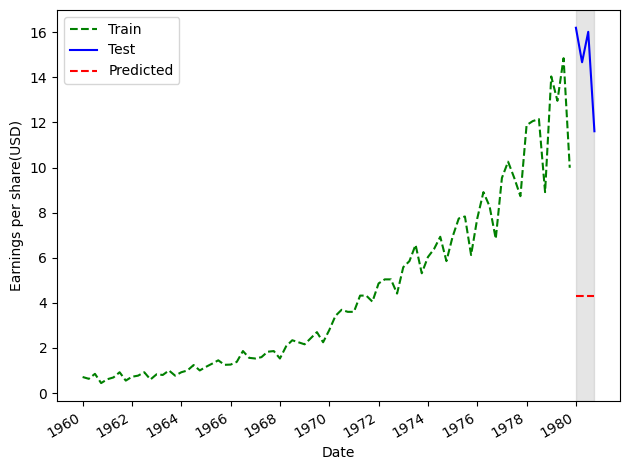

In [10]:
fig, ax = plt.subplots()
ax.plot(train["date"], train["data"], "g--", label="Train")
ax.plot(test["date"], test["data"], "b-", label="Test")
ax.plot(test["date"], test["pred_mean"], "r--", label="Predicted")
ax.set_xlabel("Date")
ax.set_ylabel("Earnings per share(USD)")
ax.axvspan(80, 83, color="grey", alpha=0.2)
ax.legend(loc=2)
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()

plt.savefig("ts2.png")

# Forecasting last year’s mean

In [11]:
last_year_mean = np.mean(train.data[-4:])
print(last_year_mean)

12.96


In [13]:
test.loc[:, "pred_last_yr_mean"] = last_year_mean
test

,date,data,pred_mean,pred_last_yr_mean
80,1980-01-01,16.20,4.3085,12.96
81,1980-04-01,14.67,4.3085,12.96
82,1980-07-02,16.02,4.3085,12.96
83,1980-10-01,11.61,4.3085,12.96


In [14]:
mape_last_year_mean = mape(test["data"], test["pred_last_yr_mean"])
mape_last_year_mean

15.5963680725103

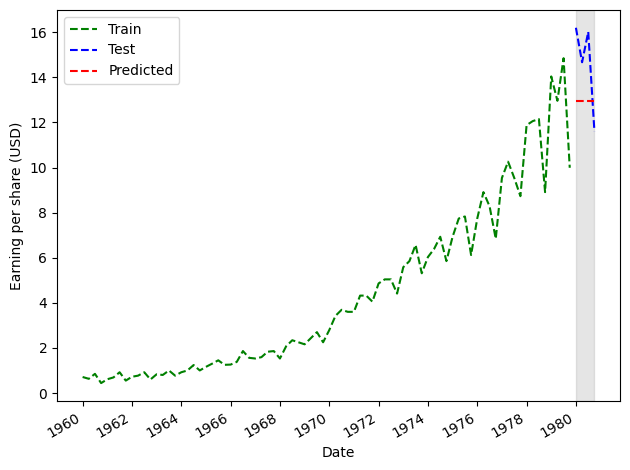

In [18]:
fig, ax = plt.subplots()

ax.plot(train["date"], train["data"], "g--", label="Train")
ax.plot(test["date"], test["data"], "b--", label="Test")
ax.plot(test["date"], test["pred_last_yr_mean"], "r--", label="Predicted")
ax.axvspan(80, 83, color="grey", alpha=0.2)
ax.set_xlabel("Date")
ax.set_ylabel("Earning per share (USD)")
ax.legend(loc="best")
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()
plt.savefig("ts3.png")

# Predicting using the last known value

In [20]:
last = train.data.iloc[-1]
last

9.99

In [21]:
test.loc[:, "pred_last"] = last
test

<ipython-input-21-2b553b77138e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, "pred_last"] = last


,date,data,pred_mean,pred_last_yr_mean,pred_last
80,1980-01-01,16.20,4.3085,12.96,9.99
81,1980-04-01,14.67,4.3085,12.96,9.99
82,1980-07-02,16.02,4.3085,12.96,9.99
83,1980-10-01,11.61,4.3085,12.96,9.99


In [22]:
mape_last = mape(test["data"], test["pred_last"])
print(mape_last)

30.457277908606535


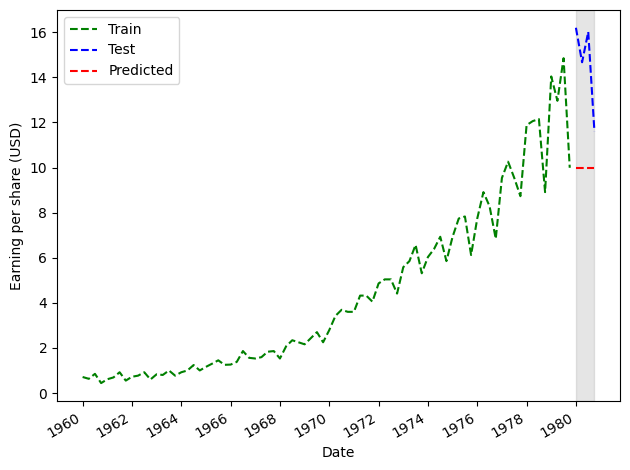

In [23]:
fig, ax = plt.subplots()

ax.plot(train["date"], train["data"], "g--", label="Train")
ax.plot(test["date"], test["data"], "b--", label="Test")
ax.plot(test["date"], test["pred_last"], "r--", label="Predicted")
ax.axvspan(80, 83, color="grey", alpha=0.2)
ax.set_xlabel("Date")
ax.set_ylabel("Earning per share (USD)")
ax.legend(loc="best")
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()
plt.savefig("ts4.png")

*  EPS displays a cyclical behavior, where it is high during the first three quarters and then falls at the last quarter
* Using the last known value does not take the seasonality into account

#Naive seasonal forecast
* The naive seasonal forecast takes the last observed cycle and repeats it into the future


In [24]:
test.loc[:, "pred_last_season"] = train["data"][-4:].values
test

<ipython-input-24-ba4cab27f4ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, "pred_last_season"] = train["data"][-4:].values


,date,data,pred_mean,pred_last_yr_mean,pred_last,pred_last_season
80,1980-01-01,16.20,4.3085,12.96,9.99,14.04
81,1980-04-01,14.67,4.3085,12.96,9.99,12.96
82,1980-07-02,16.02,4.3085,12.96,9.99,14.85
83,1980-10-01,11.61,4.3085,12.96,9.99,9.99


In [25]:
mape_naive_seasonal = mape(test["data"], test["pred_last_season"])
mape_naive_seasonal

11.561658552433654

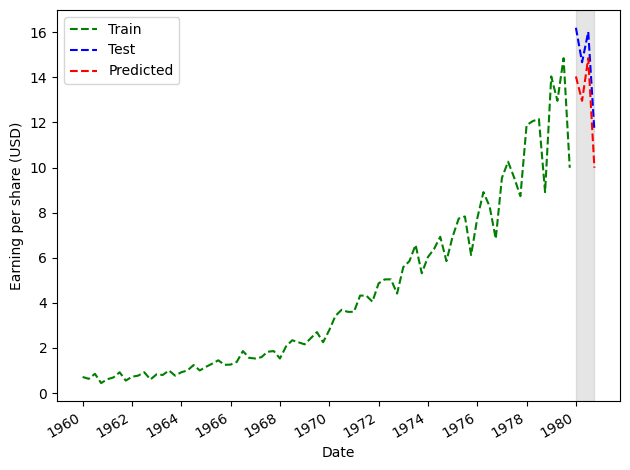

In [26]:
fig, ax = plt.subplots()

ax.plot(train["date"], train["data"], "g--", label="Train")
ax.plot(test["date"], test["data"], "b--", label="Test")
ax.plot(test["date"], test["pred_last_season"], "r--", label="Predicted")
ax.axvspan(80, 83, color="grey", alpha=0.2)
ax.set_xlabel("Date")
ax.set_ylabel("Earning per share (USD)")
ax.legend(loc="best")
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()
plt.savefig("ts5.png")

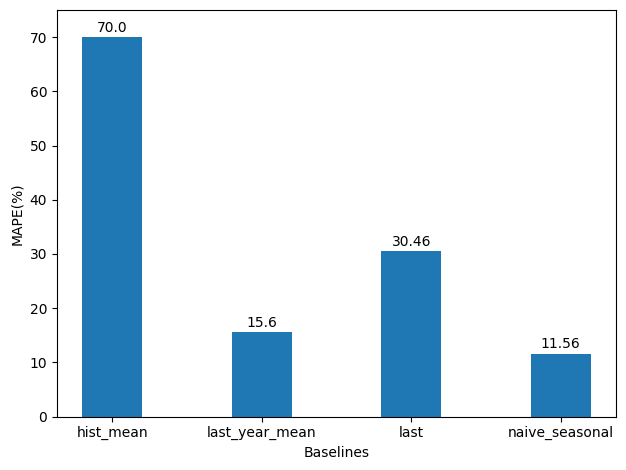

In [30]:
fig, ax = plt.subplots()

x = ["hist_mean", "last_year_mean", "last", "naive_seasonal"]
y = [70.00, 15.60, 30.46, 11.56]

ax.bar(x, y, width=0.4)
ax.set_xlabel("Baselines")
ax.set_ylabel("MAPE(%)")
ax.set_ylim(0, 75)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(value), ha="center")

plt.tight_layout()

plt.savefig("ts6.png")